#A case Study on Linear **Regression**

In [35]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#reading the dataset
df = pd.read_csv('/content/sample_data/insurance.csv')

### Data Exploration

In [37]:
#first five rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
#gathering info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [39]:
#getting the number of null values per column
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [40]:
#getting the statistical information
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [41]:
#getting the sum of duplicated entries
df.duplicated().sum()

np.int64(1)

In [42]:
#viewing the duplicate out of curiosity
df[df.duplicated(keep = False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [43]:
#dropping the duplicates
df.drop_duplicates(inplace=True)
#verifying if drop operation did its thing
df.duplicated().sum()

np.int64(0)

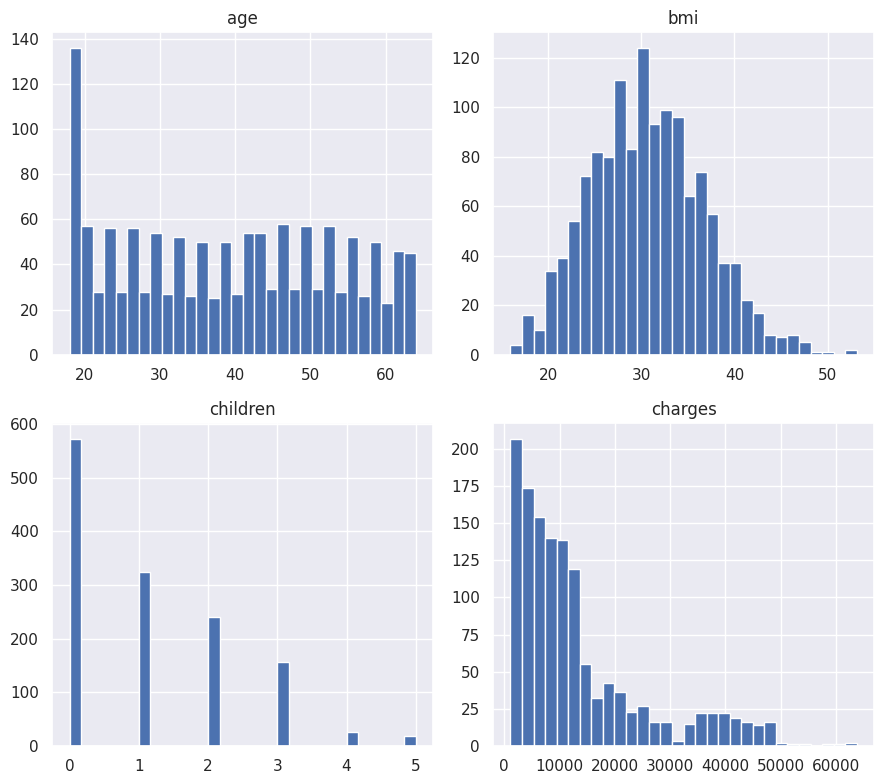

In [44]:
#visualizing all numerical columns
df.hist(figsize=(9,8), bins=30)
plt.tight_layout()
plt.show()

**INSIGHTS** -

 * Age: The dataset has a notably higher number of individuals in the youngest age group compared to the rest.
 There is a notebaly normal distribution for the rest of age groups.

 * BMI: The majority of individuals in the dataset fall within the overweight BMI range.

 * Children: The vast majority of individuals in this dataset have either zero or one child, with the number of individuals decreasing as the number of children increases.

 * Charges: The insurance charges are heavily skewed towards the lower end, with a large number of individuals having relatively low charges and a decreasing number of individuals incurring progressively higher costs. There also appear to be a few distinct groups with higher charges.

 * Smoker: The dataset contains more non-smokers than smokers.

 * Region: The distribution of individuals across the four regions is fairly even, with a slightly higher representation in the southeast.





  






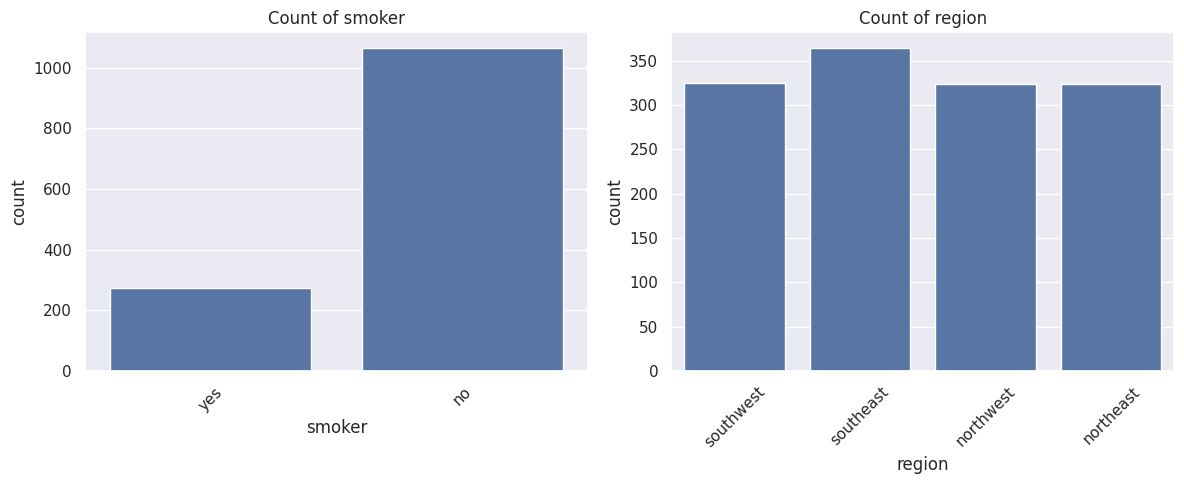

In [45]:
#visualizing categorical columns
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(12,5))  # 1 row, 2 columns

cols = ['smoker', 'region']

for ax, col in zip(axes, cols):
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_title(f'Count of {col}')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


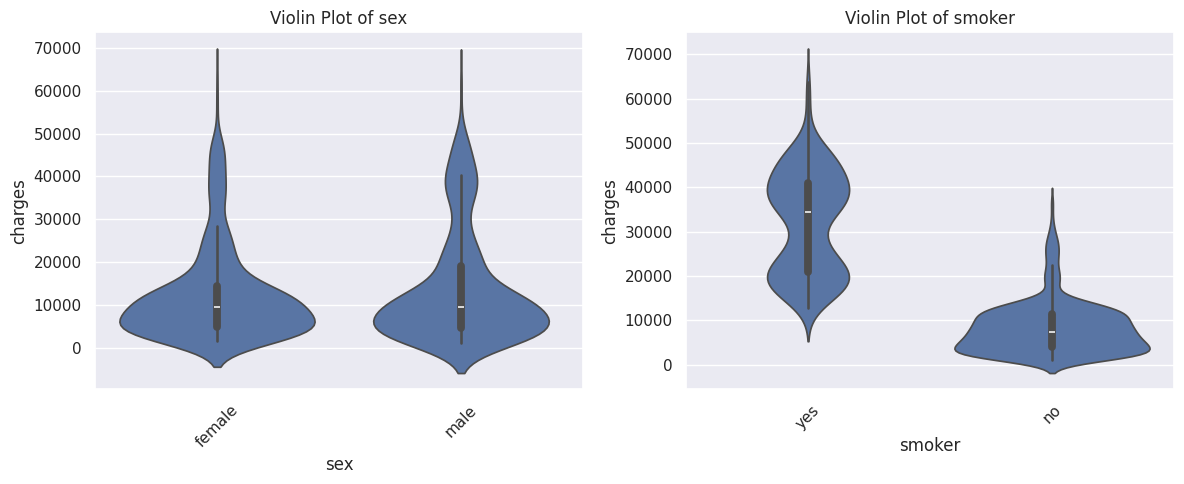

In [46]:
#analyzing relationship between categorical columns (smoker, region ) and target
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

cols = ['sex', 'smoker']

for ax, col in zip(axes, cols):
    sns.violinplot(x=col, y='charges', data=df, ax=ax)
    ax.set_title(f'Violin Plot of {col}')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Insights-**

- The distribution of insurance charges appears similar for both male and female individuals.
- Smoking status is a strong predictor of insurance charges, with smokers incurring significantly higher costs compared to non-smokers, which aligns with expectations.

<Axes: xlabel='children', ylabel='charges'>

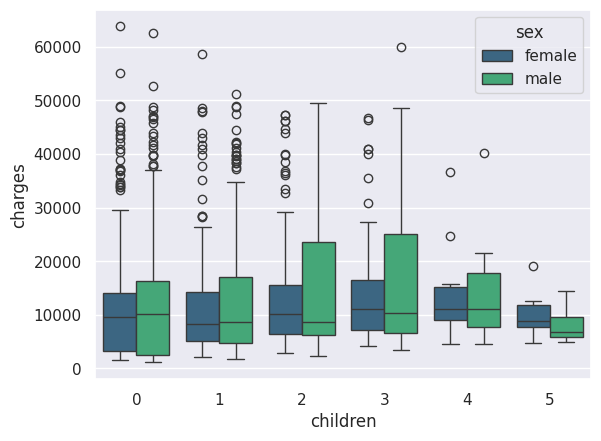

In [47]:
#analyzing relationship between children and target in relation with gender
sns.boxplot(x='children', y='charges', hue='sex', data=df, palette='viridis')

INSIGHTS

* Insurance charges tend to increase with the number of children up to three, with males generally having slightly higher charges than females.
* There's considerable variability in charges within each group, especially for those with fewer children, as indicated by the spread and outliers.

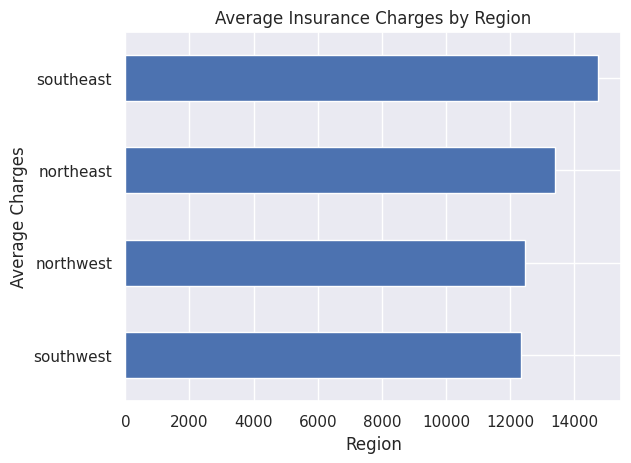

In [48]:
region_charges = df.groupby('region')['charges'].mean()
region_charges = region_charges.sort_values(ascending=True)

# Plot the grouped data
region_charges.plot(kind='barh')  # Create a bar plot
plt.xlabel('Region')  # Label the x-axis
plt.ylabel('Average Charges')  # Label the y-axis
plt.title('Average Insurance Charges by Region')  # Add a title
plt.show()  # Display the plot


* average insurance charges vary by region, with the Southeast having the highest average charges, followed by the Northeast, Northwest, and Southwest.

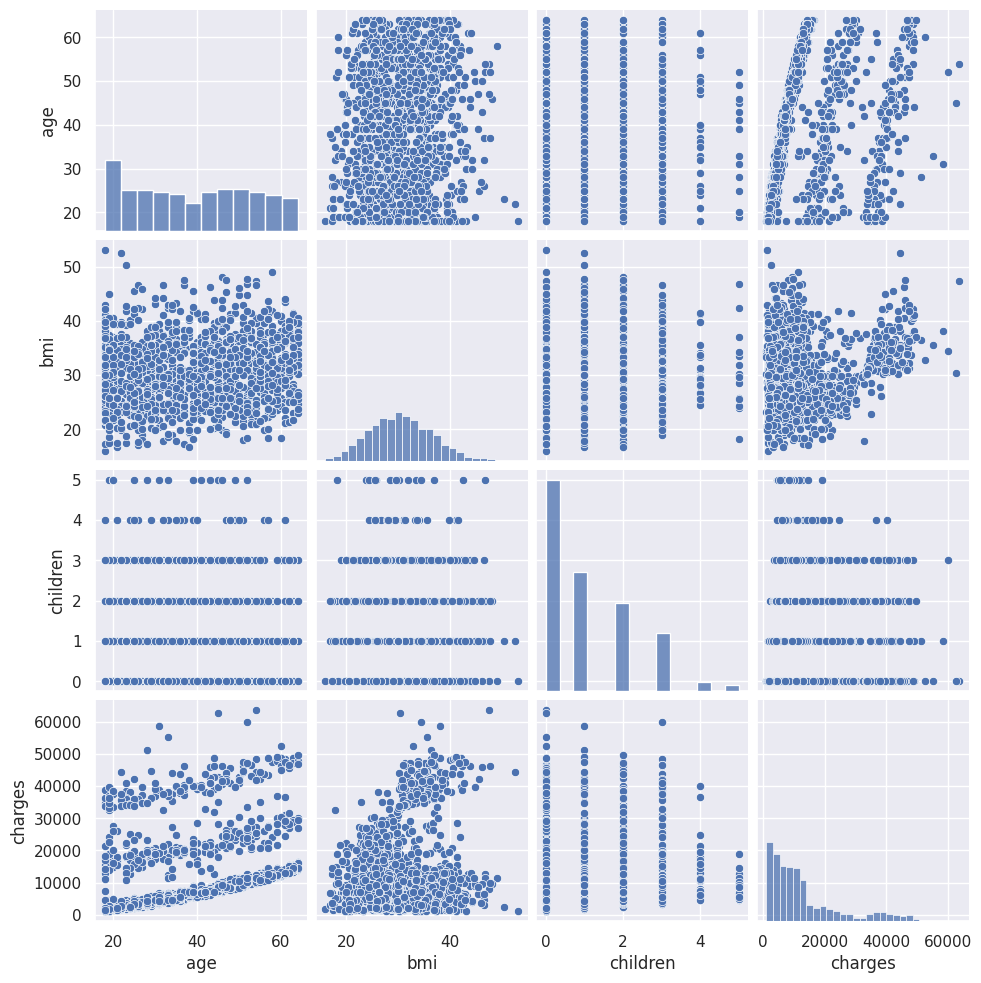

In [49]:
# identifying all cross relations using pairplot
sns.pairplot(df)

<Axes: >

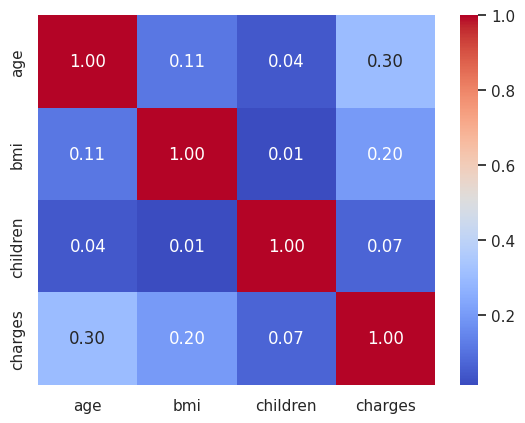

In [50]:
#calculating the correlation
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

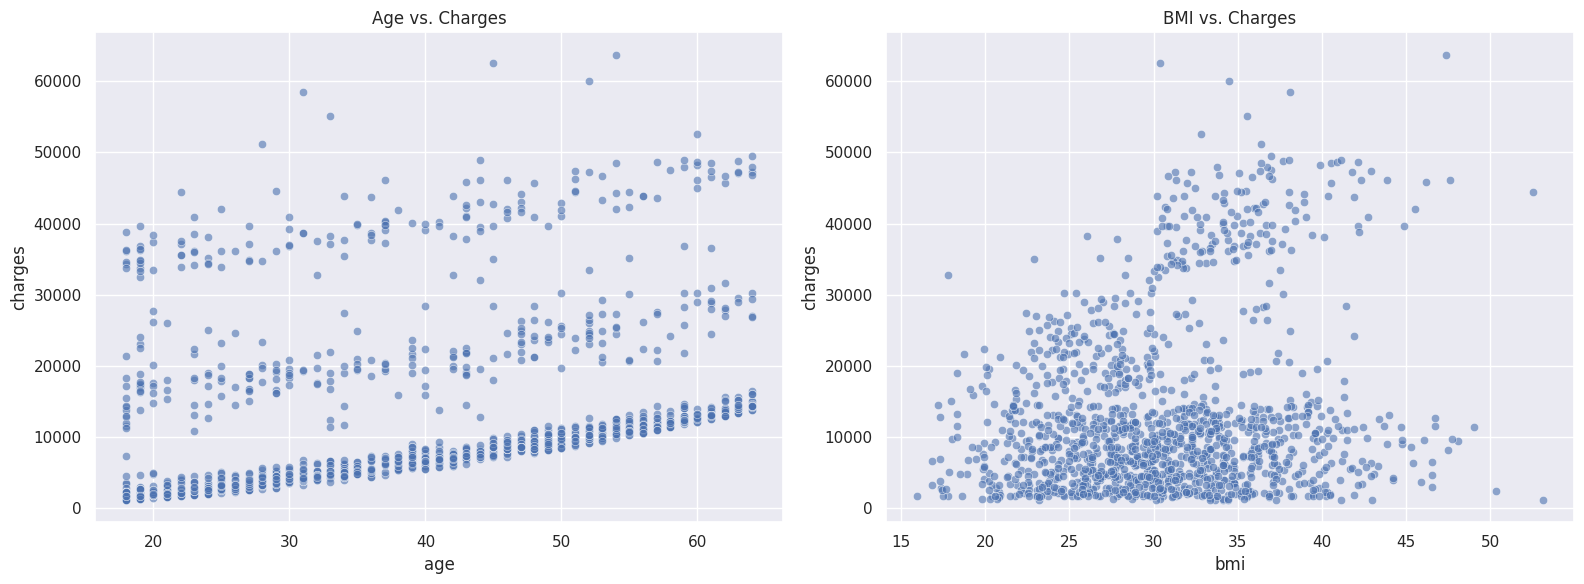

In [51]:
#In the earlier pairplot, we saw age and bmi having a somewhat positive relationship with target, to analyse further
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Age vs. Charges
sns.scatterplot(x='age', y='charges', data=df, alpha=0.6, ax=ax1)
ax1.set_title("Age vs. Charges")

# BMI vs. Charges
sns.scatterplot(x='bmi', y='charges', data=df, alpha=0.6, ax=ax2)
ax2.set_title("BMI vs. Charges")

plt.tight_layout()
plt.show()

INSIGHTS

 * Age vs. Charges: Insurance charges tend to be higher for older individuals, with distinct groups of higher costs becoming more prevalent with increasing age.

 * BMI vs. Charges: There's a more noticeable positive correlation between BMI and insurance charges. As BMI increases, the charges tend to rise, particularly beyond a BMI of around 30. There's also a wider spread of charges at higher BMIs.

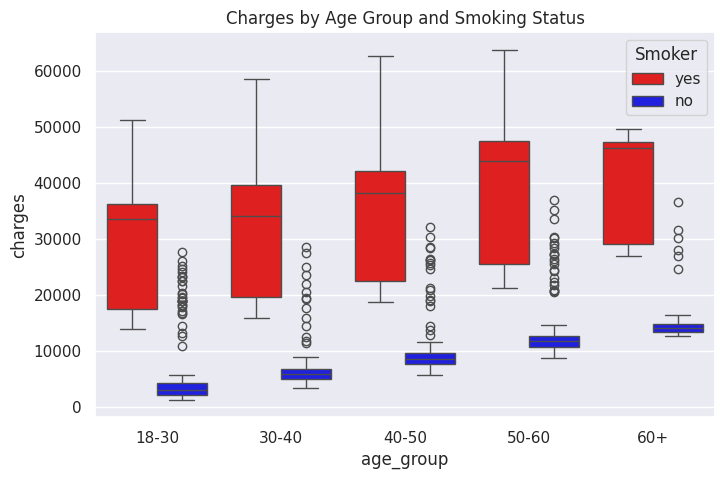

In [52]:
#relationship between age group, smoking status, and insurance charges
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 70], labels=['18-30', '30-40', '40-50', '50-60', '60+'])

plt.figure(figsize=(8,5))
sns.boxplot(x='age_group', y='charges', hue='smoker', data=df, palette={'yes':'red', 'no':'blue'})
plt.title("Charges by Age Group and Smoking Status")
plt.legend(title="Smoker")
plt.show()

* Across all age groups, smokers (red boxes) consistently have significantly higher insurance charges compared to non-smokers (blue boxes). This difference is substantial and appears to be the most influential factor in determining charges.


<ipython-input-53-285e2474e087>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='children', y='charges', hue='sex', data=df, estimator='mean', ci=None, palette='viridis')


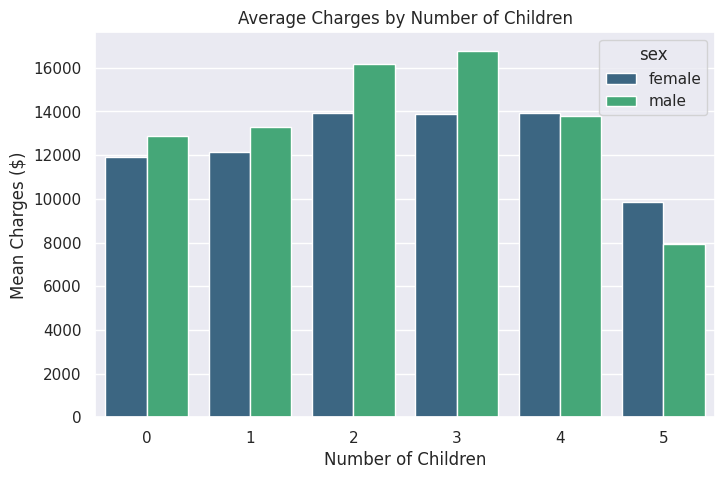

In [53]:
#relationship between children, gender, and insurance charges
plt.figure(figsize=(8, 5))
sns.barplot(x='children', y='charges', hue='sex', data=df, estimator='mean', ci=None, palette='viridis')
plt.title("Average Charges by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Mean Charges ($)")
plt.show()

* Average insurance charges tend to rise with the number of children up to three, with males generally paying slightly more, but this trend shifts with four or five children.

<ipython-input-54-127260b56580>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bmi_category', y='charges', data=df, palette='viridis')


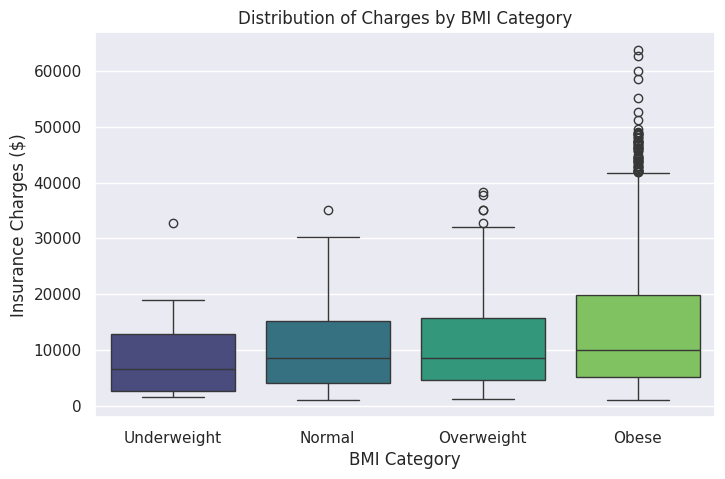

In [54]:
df['bmi_category'] = pd.cut(df['bmi'],
                            bins=[0, 18.5, 25, 30, 100],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

plt.figure(figsize=(8,5))
sns.boxplot(x='bmi_category', y='charges', data=df, palette='viridis')
plt.title("Distribution of Charges by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Insurance Charges ($)")
plt.show()

 * Insurance charges tend to increase with BMI category, with obese individuals having significantly higher and more variable charges compared to other BMI categories.

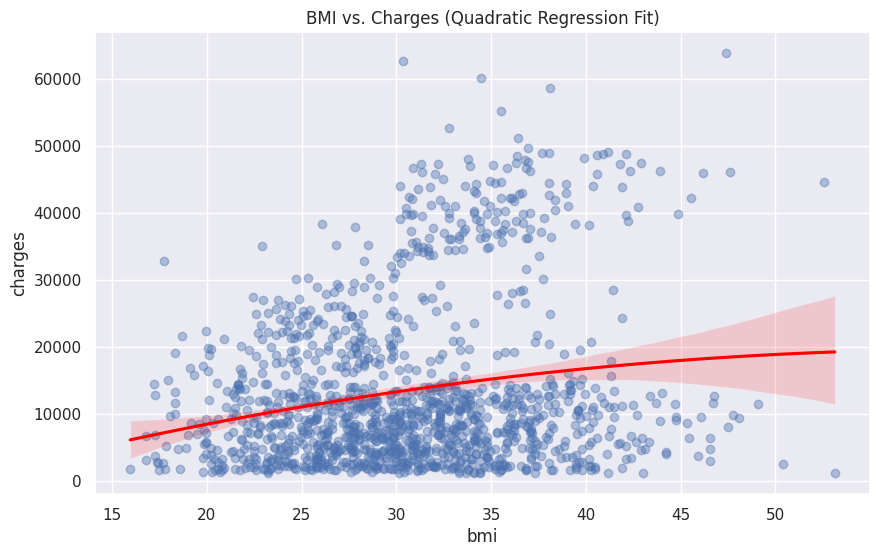

In [55]:
#plotting a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='bmi', y='charges', data=df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'}, order=2)
plt.title("BMI vs. Charges (Quadratic Regression Fit)")
plt.show()

 * The first model showed that predictions were often very different around the top 25% and highest values, making the error bigger. This happened mostly because of unusual data points (outliers), especially with BMI and charges. So, to make the model better, we need to remove these outliers.

### Data PreProcessing

In [56]:
# encoding categorical columns - smoker, sex
from sklearn.preprocessing import LabelEncoder, StandardScaler

labelEncoder = LabelEncoder()
categ_columns = ['smoker','sex']

for col in categ_columns:
    df[col] = labelEncoder.fit_transform(df[col])

#scaling bmi using standard scaling
df['bmi'] = StandardScaler().fit_transform(df[['bmi']])

#scaling age using standrad scaling
df['age'] = StandardScaler().fit_transform(df[['age']])

# one hot encoding region column
df = pd.get_dummies(df, columns=['region'], prefix='region', drop_first=True)



# scaling/normalizing charges column using log - since the column is right skewed
df['charges'] = np.log(df['charges'])

df.head()

,age,sex,bmi,children,smoker,charges,age_group,bmi_category,region_northwest,region_southeast,region_southwest
0,-1.440418,0,-0.453160,0,1,9.734176,18-30,Overweight,False,False,True
1,-1.511647,1,0.509422,1,0,7.453302,NaN,Obese,False,True,False
2,-0.799350,1,0.383155,3,0,8.400538,18-30,Obese,False,True,False
3,-0.443201,1,-1.305052,0,0,9.998092,30-40,Normal,True,False,False
4,-0.514431,1,-0.292456,0,0,8.260197,30-40,Overweight,True,False,False


<Axes: xlabel='charges', ylabel='Count'>

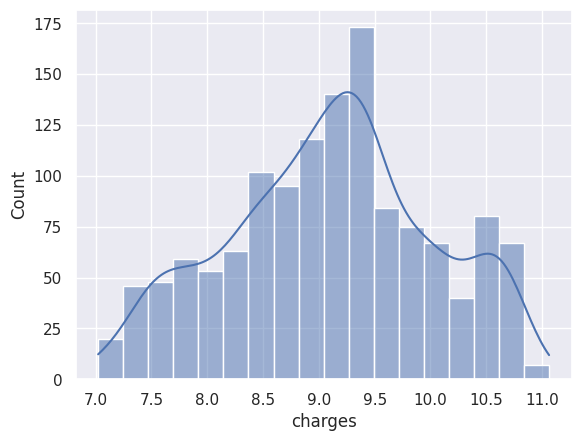

In [57]:
#plotting to see if the log worked like a charm
sns.histplot(df['charges'], kde=True)

### Model Development

In [58]:
#splitting the dataset
from sklearn.model_selection import train_test_split

X=df.drop(columns = ['charges','age_group', 'bmi_category'], axis=1)
y=df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
1114,-1.155499,1,-1.009063,0,0,False,False,False
968,-1.297958,1,-0.806543,2,0,False,False,False
599,0.910164,0,1.125178,2,0,True,False,False
170,1.693691,1,1.772092,0,0,False,True,False
275,0.554015,0,-0.666338,2,0,False,False,False


In [59]:
#importing the model
from sklearn.linear_model import LinearRegression

#instance of Linear Regression model
model = LinearRegression()

In [60]:
#training the model on data
model.fit(X_train, y_train)

LinearRegression()

### Evaluation of model's performance

**Linear Regression Error Metrics**

 * Mean Absolute Error (MAE):Calculates the average absolute difference between predicted and actual values.Easy to interpret, gives a sense of the typical error magnitude.Less sensitive to outliers than MSE.

 * Mean Squared Error (MSE):Calculates the average of the squared differences between predicted and actual values.Penalizes larger errors more heavily than MAE.Commonly used in optimization algorithms.
Sensitive to outliers.

 * Root Mean Squared Error (RMSE):The square root of the MSE.Expressed in the same units as the target variable, making it more interpretable than MSE.Also sensitive to outliers.

 * R-squared:Represents the proportion of the variance in the dependent variable that is explained by the independent variables in the model.Ranges from 0 to 1 (higher is better).Can be misleading if new independent variables are added to the model.

 * Adjusted R-squared:A modified version of R-squared that adjusts for the number of predictors in the model.More useful for comparing models with different numbers of independent variables.

In [61]:
#calculating r^2 (note this is on logged data)
r_squared = model.score(X_test, y_test)
print(f"R-squared on the test set: {r_squared}")



R-squared on the test set: 0.8294642959644735


In [66]:
#y_pred_log = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

#taking the predicted values and our test data and converting it back to orginal values from log, so that we can compare it

y_pred_scaled = model.predict(X_test)

y_test_original = np.exp(y_test)
y_pred_original = np.exp(y_pred_scaled)


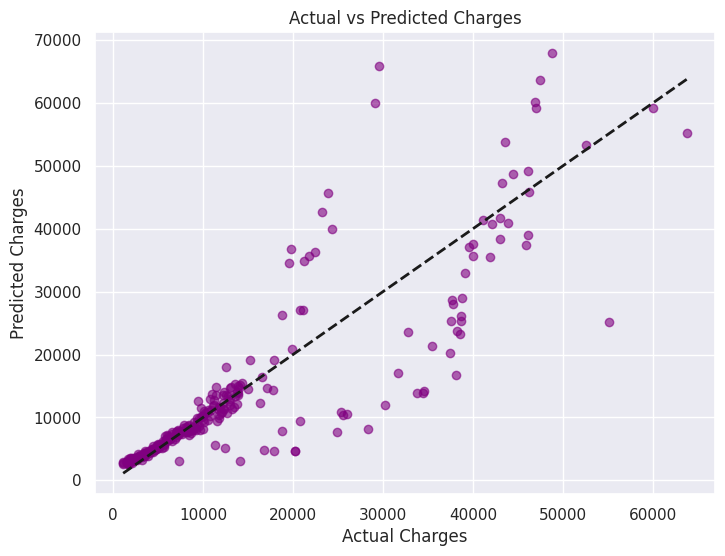

In [63]:
#plotting to see the predicted and actual value difference
plt.figure(figsize=(8,6))
plt.scatter(y_test_original, y_pred_original, alpha=0.6, color='purple')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()


In [64]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating R^2 and mean absolute error
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

print(f"MAE: {mae}")
print(f"R2 Score: {r2}")


MAE: 3756.20504328384
R2 Score: 0.7180462873105278


In [65]:

coefficients = model.coef_

# Getting the feature names from training data's columns
feature_names = X_train.columns

# Creating a Pandas Series to easily associate coefficients with feature names
coefficients_series = pd.Series(coefficients, index=feature_names)

#  Displaying coefficients sorted by their absolute value
coefficients_abs_sorted = coefficients_series.abs().sort_values(ascending=False)
print("\nCoefficients Sorted by Absolute Value:")
print(coefficients_series[coefficients_abs_sorted.index])

# Getting the intercept
intercept = model.intercept_
print(f"\nModel Intercept: {intercept}")



Coefficients Sorted by Absolute Value:
smoker              1.537508
age                 0.477283
region_southeast   -0.128597
region_southwest   -0.101252
children            0.099169
bmi                 0.080191
sex                -0.076797
region_northwest   -0.043657
dtype: float64

Model Intercept: 8.788655955715328


**Interpretations of the model's findings.**

 * Smoking Status is Key: A person's smoking status has the greatest impact on their predicted insurance charges. Smokers are expected to have substantially higher charges.
Age Matters Significantly: Age is also a strong predictor. As people get older, their predicted insurance charges increase noticeably.

 * Regional Differences Exist: The region of residence influences charges. Compared to a base region, the Southeast region is associated with higher charges, while the Southwest and Northwest regions are associated with lower charges.

* Children and BMI Impact Charges: The number of children a person has and their body mass index (BMI) both contribute to the predicted charges. Higher values for these factors lead to higher predicted costs.

* Gender Has a Minor Effect: Gender has a small influence on predicted charges. Females are predicted to have slightly lower charges than males, all else being equal.

* Baseline Charge: The model's intercept (8.788655955715328) represents the estimated charge for a hypothetical person with all other factors being zero (non-smoker, age zero, etc.). This serves as the starting point from which the other factors adjust the prediction.


Model Performance

 * The R-squared value (0.718) indicates that the model explains approximately 71.8% of the variance in the log of insurance charges.

 * The Mean Absolute Error (MAE) of 3756.2050432838414 represents the average absolute difference between the predicted and actual charges in the original currency units.



